In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
df

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class
0,SRR5233637,3.061608,24,MIXCR,7.712411,27947,polyclonal,small_intestine,T_cell_poor,4.650803,T_cell_poor_polyclonal
1,SRR5233637,4.562193,115,IMREP,7.712411,27947,polyclonal,small_intestine,T_cell_poor,3.150218,T_cell_poor_polyclonal
2,SRR5233637,4.309543,118,TRUST4,7.712411,27947,polyclonal,small_intestine,T_cell_poor,3.402869,T_cell_poor_polyclonal
3,SRR5233639,5.478183,353,MIXCR,10.059157,202869,polyclonal,lymph_node,T_cell_rich,4.580975,T_cell_rich_polyclonal
4,SRR5233639,7.548679,2342,IMREP,10.059157,202869,polyclonal,lymph_node,T_cell_rich,2.510478,T_cell_rich_polyclonal
5,SRR5233639,7.186224,2362,TRUST4,10.059157,202869,polyclonal,lymph_node,T_cell_rich,2.872934,T_cell_rich_polyclonal
6,sample01,0.829164,2592,MIXCR,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.243510,T_cell_rich_monoclonal
7,sample01,1.163479,3682,IMREP,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.090805,T_cell_rich_monoclonal
8,sample01,1.165598,4154,TRUST4,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.092923,T_cell_rich_monoclonal
9,sample02,0.988740,1565,MIXCR,1.001202,3229,monoclonal,PBMC,T_cell_rich,0.012462,T_cell_rich_monoclonal


In [3]:
T_cell_poor_monoclonal = pd.read_csv("../summary_data/subsample/T_cell_poor_monoclonal_diversity.csv")
df_combined = pd.concat([df,T_cell_poor_monoclonal],ignore_index=True,sort=False)
df_combined

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class
0,SRR5233637,3.061608,24,MIXCR,7.712411,27947.0,polyclonal,small_intestine,T_cell_poor,4.650803,T_cell_poor_polyclonal
1,SRR5233637,4.562193,115,IMREP,7.712411,27947.0,polyclonal,small_intestine,T_cell_poor,3.150218,T_cell_poor_polyclonal
2,SRR5233637,4.309543,118,TRUST4,7.712411,27947.0,polyclonal,small_intestine,T_cell_poor,3.402869,T_cell_poor_polyclonal
3,SRR5233639,5.478183,353,MIXCR,10.059157,202869.0,polyclonal,lymph_node,T_cell_rich,4.580975,T_cell_rich_polyclonal
4,SRR5233639,7.548679,2342,IMREP,10.059157,202869.0,polyclonal,lymph_node,T_cell_rich,2.510478,T_cell_rich_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...
60,insilco_sample2,0.363360,1,IMREP,1.001202,NaN,monoclonal,NaN,T_cell_poor,0.637842,T_cell_poor_monoclonal
61,insilco_sample2,0.364596,1,TRUST4,1.001202,NaN,monoclonal,NaN,T_cell_poor,0.636605,T_cell_poor_monoclonal
62,insilco_sample3,0.452226,3,MIXCR,0.960516,NaN,monoclonal,NaN,T_cell_poor,0.508290,T_cell_poor_monoclonal
63,insilco_sample3,0.384446,2,IMREP,0.960516,NaN,monoclonal,NaN,T_cell_poor,0.576071,T_cell_poor_monoclonal


TCR-Seq clonotype counts

In [4]:
clonotype_TCR = df[['Sample','clonotype_count_TCR','repertoire_type','class','tissue']].drop_duplicates(keep='first')

In [5]:
x = stats.normaltest(clonotype_TCR['clonotype_count_TCR'])
x

NormaltestResult(statistic=49.07355293118966, pvalue=2.2070561248672414e-11)

In [6]:
mean_clonotype_TCR = clonotype_TCR.groupby("repertoire_type")["clonotype_count_TCR"].agg(["mean", "std"]) 
display(mean_clonotype_TCR)

,mean,std
repertoire_type,,
monoclonal,4642.333333,2647.874116
polyclonal,20815.235294,47693.485351


In [7]:
df_group1 = clonotype_TCR[clonotype_TCR['repertoire_type'] == 'monoclonal']
df_group2 = clonotype_TCR[clonotype_TCR['repertoire_type'] == 'polyclonal']
stats.ttest_ind(df_group1['clonotype_count_TCR'], df_group2['clonotype_count_TCR'])

Ttest_indResult(statistic=-0.5742375604694886, pvalue=0.5729139916560235)

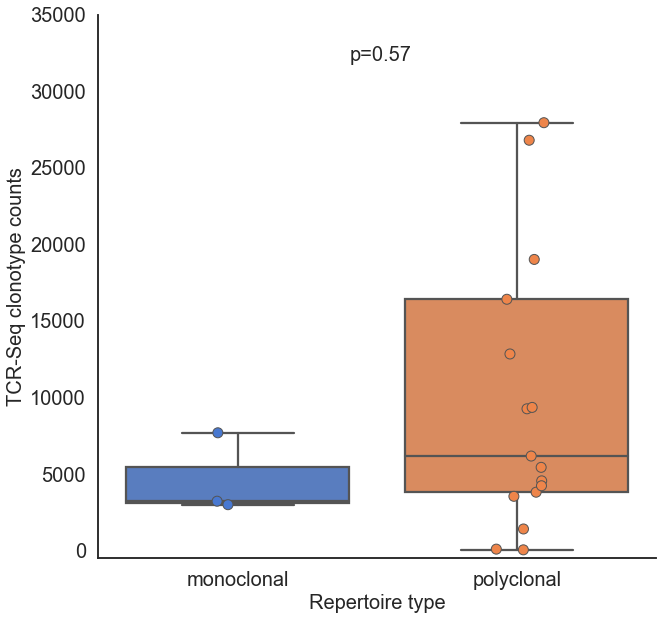

In [8]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='repertoire_type',y='clonotype_count_TCR',data=clonotype_TCR,palette="muted",
                 order=['monoclonal','polyclonal'])
sns.stripplot(x="repertoire_type",y="clonotype_count_TCR",data=clonotype_TCR,s=10,color=".3",palette="muted",dodge=True,
              linewidth=1,order=['monoclonal','polyclonal'])
plt.ylim(-500, 35000)
ax.set_xlabel('Repertoire type',fontsize=20)
ax.set_ylabel('TCR-Seq clonotype counts',fontsize=20)
plt.text(0.4,32000,'p=0.57',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS3_a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3_a.png",bbox_inches="tight")
plt.show()

In [9]:
clonotype_TCR.groupby("tissue")["clonotype_count_TCR"].agg(["mean", "std"]) 

,mean,std
tissue,,
PBMC,9238.833333,8947.653355
kidney,1917.000000,2114.181638
lymph_node,202869.000000,NaN
melanoma,8420.666667,6438.106826
small_intestine,27947.000000,NaN


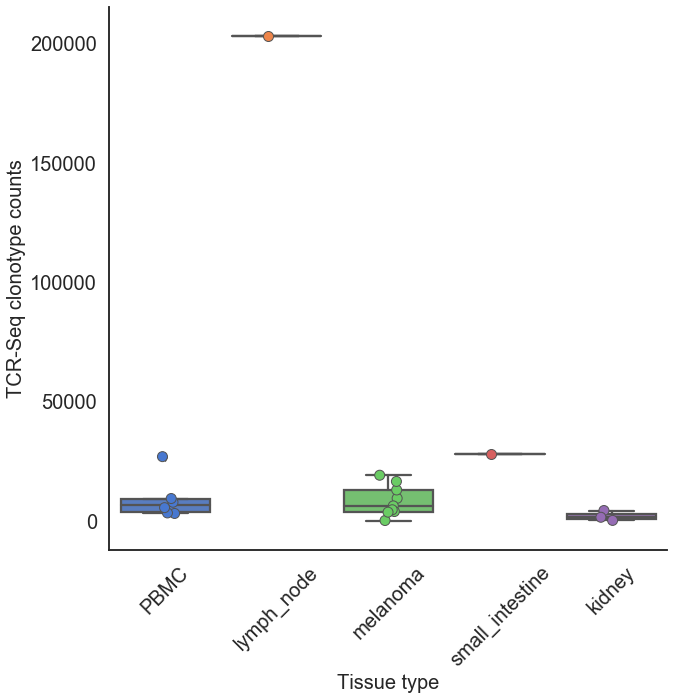

In [10]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='tissue',y='clonotype_count_TCR',data=clonotype_TCR,palette="muted",
                order=['PBMC','lymph_node','melanoma','small_intestine','kidney'])
sns.stripplot(x="tissue",y="clonotype_count_TCR",data=clonotype_TCR,s=10,color=".3",palette="muted",
              dodge=True,linewidth=1,order=['PBMC','lymph_node','melanoma','small_intestine','kidney'])
#plt.ylim(-500, 35000)
ax.set_xlabel('Tissue type',fontsize=20)
ax.set_ylabel('TCR-Seq clonotype counts',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
sns.despine()

plt.savefig("../figures/supplementary/figureS3_b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3_b.png",bbox_inches="tight")
plt.show()

RNA-Seq clonotype counts

In [11]:
mean_clonotype = df_combined.groupby("class")["clonotype_count_tool"].agg(["mean", "std"])
display(mean_clonotype)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:
    print(tool)
    df_tool = df_combined.loc[df_combined['tool'] == tool]
    mean_clonotype_tool = df_tool.groupby("class")["clonotype_count_tool"].agg(["mean", "std"]) 
    display(mean_clonotype_tool)

,mean,std
class,,
T_cell_poor_monoclonal,1.444444,0.726483
T_cell_poor_polyclonal,52.514286,51.357668
T_cell_rich_monoclonal,3345.333333,1375.216528
T_cell_rich_polyclonal,1210.250000,1395.911180


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,1.666667,1.154701
T_cell_poor_polyclonal,32.777778,27.589753
T_cell_rich_monoclonal,1723.000000,801.762434
T_cell_rich_polyclonal,320.000000,380.034209


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,1.333333,0.577350
T_cell_poor_polyclonal,43.615385,43.725543
T_cell_rich_monoclonal,3862.333333,466.422913
T_cell_rich_polyclonal,1553.750000,1539.600029


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,1.333333,0.577350
T_cell_poor_polyclonal,75.076923,64.221572
T_cell_rich_monoclonal,4450.666667,723.176558
T_cell_rich_polyclonal,1757.000000,1737.044808


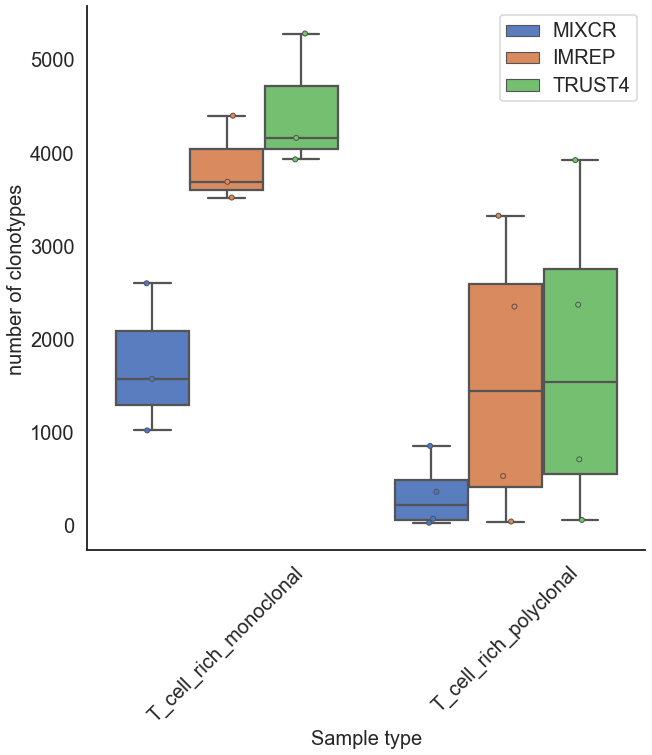

In [12]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='class',y='clonotype_count_tool',data=df,palette="muted",
                 hue='tool',order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'])
sns.stripplot(x="class",y="clonotype_count_tool",data=df,s=5,palette="muted",
              hue='tool',order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'],dodge=True,linewidth=1)
ax.set_xlabel('Sample type',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS3_c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS3_c.png",bbox_inches="tight")
plt.show()